## Convolutional Neural Networks - MNIST dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

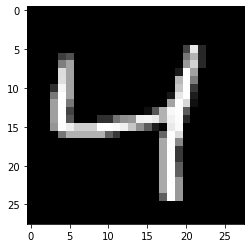

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2], cmap='gray')

In [7]:
y_train[2]

4

In [8]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [9]:
print(f" Training Shape {X_train.shape} Test Shape {X_test.shape}")

 Training Shape (60000, 28, 28, 1) Test Shape (10000, 28, 28, 1)


In [11]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [10]:
X_train = X_train/255.0
X_test = X_test/255.0

In [12]:
from tensorflow.keras.models import Sequential

In [13]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D

In [14]:
#create model
model = Sequential()

In [15]:
# Convolutional Layer with 32 filters, 3*3 filter size, stride = 1 and no padding
model.add(Conv2D(32, 
                 kernel_size=3,
                 activation='relu',
                 padding='valid', # value = 'same' if padding is needed
                 input_shape=(28,28,1)))

In [16]:
model.add(MaxPool2D(pool_size = 2)) #Maxpool2d

In [17]:
model.add(Flatten()) # Flatten

In [18]:
model.add(Dense(64, activation = 'relu')) # Fully Connected Layer

In [19]:
model.add(Dense(10, activation='softmax')) # Output layer

In [25]:
28-3+1, (3*3+1)*32, 13*13*32, (5408+1)*64, (64+1)*10

(26, 320, 5408, 346176, 650)

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 64)                346176    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 347,146
Trainable params: 347,146
Non-trainable params: 0
__________________________________________________

In [26]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

In [27]:
model.fit(X_train, 
          y_train, 
          validation_data=(X_test, y_test), 
          epochs=5)

Epoch 1/5
1875/1875 [==============================] - 32s 14ms/step - loss: 0.1698 - accuracy: 0.9502 - val_loss: 0.0818 - val_accuracy: 0.9731
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0608 - accuracy: 0.9820 - val_loss: 0.0485 - val_accuracy: 0.9833
Epoch 3/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0409 - accuracy: 0.9872 - val_loss: 0.0554 - val_accuracy: 0.9807
Epoch 4/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0272 - accuracy: 0.9913 - val_loss: 0.0450 - val_accuracy: 0.9852
Epoch 5/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0203 - accuracy: 0.9934 - val_loss: 0.0546 - val_accuracy: 0.9828


In [28]:
import numpy as np

In [38]:
print(model.predict(X_train)[0])
print(np.argmax(model.predict(X_train)[0]))

[1.9305061e-16 3.5126554e-10 5.0424454e-10 7.4382439e-02 5.3335911e-13
 9.2561752e-01 3.6361861e-10 6.6047150e-12 4.6039341e-09 3.9448189e-08]
5


In [29]:
y_train_pred = np.argmax(model.predict(X_train),axis=1)

In [30]:
y_test_pred = np.argmax(model.predict(X_test), axis=1)

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [32]:
print("Training Set Confusion Matrix")
print(confusion_matrix(y_pred = y_train_pred, y_true=y_train))
print("\n")
print(f" Accuracy {accuracy_score(y_pred = y_train_pred, y_true=y_train)}")

Training Set Confusion Matrix
[[5907    0    1    0    0    0   13    0    2    0]
 [   0 6727    1    0    0    0    5    7    2    0]
 [   6    1 5905    1   16    1    2   19    7    0]
 [   0    0    1 6115    0    3    2    5    4    1]
 [   0    1    0    0 5827    0    4    4    6    0]
 [   0    1    0    6    0 5399   11    0    3    1]
 [   0    0    0    0    1    0 5917    0    0    0]
 [   1    2    0    0    0    0    0 6257    1    4]
 [   1    1    1    1    0    0   14    1 5832    0]
 [   5    1    1    7  130    5    1   34   22 5743]]


 Accuracy 0.9938166666666667


In [33]:
print("Test Set Confusion Matrix")
print(confusion_matrix(y_pred = y_test_pred, y_true=y_test))
print("\n")
print(f" Accuracy {accuracy_score(y_pred = y_test_pred, y_true=y_test)}")

Test Set Confusion Matrix
[[ 973    0    0    1    1    1    3    0    1    0]
 [   0 1128    0    1    0    0    4    1    1    0]
 [   8    4 1002    1    3    0    2    8    4    0]
 [   0    0    4  994    0    7    0    2    3    0]
 [   0    0    0    0  978    0    1    1    1    1]
 [   0    0    0    8    0  878    5    0    1    0]
 [   4    2    0    1    2    1  947    0    1    0]
 [   0    1    4    2    0    0    0 1018    1    2]
 [   2    0    2    1    0    3    5    3  956    2]
 [   2    3    1    6   25    5    0   10    3  954]]


 Accuracy 0.9828


In [40]:
model.save('my_cnn_mnist_model_22Jul.h5')

In [41]:
m1 = tf.keras.models.load_model('my_cnn_mnist_model_22Jul.h5')

In [42]:
y_train_pred1 = np.argmax(m1.predict(X_train),axis=1)

In [43]:
print("Confusion Matrix")
print(confusion_matrix(y_pred = y_train_pred1, y_true=y_train))
print("\n")
print(f" Accuracy {accuracy_score(y_pred = y_train_pred1, y_true=y_train)}")

Confusion Matrix
[[5907    0    1    0    0    0   13    0    2    0]
 [   0 6727    1    0    0    0    5    7    2    0]
 [   6    1 5905    1   16    1    2   19    7    0]
 [   0    0    1 6115    0    3    2    5    4    1]
 [   0    1    0    0 5827    0    4    4    6    0]
 [   0    1    0    6    0 5399   11    0    3    1]
 [   0    0    0    0    1    0 5917    0    0    0]
 [   1    2    0    0    0    0    0 6257    1    4]
 [   1    1    1    1    0    0   14    1 5832    0]
 [   5    1    1    7  130    5    1   34   22 5743]]


 Accuracy 0.9938166666666667
